## Import Library

In [1]:
import pandas as pd

## Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd "/content/drive/MyDrive/Fast Track Data Engineer/Homework/Machine Learning"

/content/drive/MyDrive/Fast Track Data Engineer/Homework/Machine Learning


In [4]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('Prediction Insurance.csv')

## Data Understanding

In [5]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


No Missing value

In [7]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [8]:
df.shape

(381109, 12)

In [9]:
df.duplicated().sum()

0

No Duplicated data

1.	id: Identifikasi unik untuk setiap entri atau pelanggan dalam dataset.
2.	Gender: Jenis kelamin pelanggan (misalnya, 'Male' atau 'Female').
3.	Age: Usia pelanggan dalam tahun.
4.	Driving_License: Status kepemilikan lisensi mengemudi (0 untuk tidak memiliki, 1 untuk memiliki).
5.	Region_Code: Kode wilayah tempat tinggal pelanggan, biasanya dalam bentuk angka yang mengindikasikan area geografis.
6.	Previously_Insured: Status apakah pelanggan sudah memiliki asuransi sebelumnya (0 untuk tidak memiliki, 1 untuk memiliki).
7.	Vehicle_Age: Usia kendaraan yang dimiliki oleh pelanggan (misalnya, 'New', '1-2 Year', 'More than 2 Years').
8.	Vehicle_Damage: Indikasi apakah kendaraan pelanggan pernah mengalami kerusakan sebelumnya (misalnya, 'Yes' atau 'No').
9.	Annual_Premium: Premi tahunan yang harus dibayar oleh pelanggan untuk asuransi (dalam mata uang yang relevan).
10.	Policy_Sales_Channel: Kode numerik yang menunjukkan saluran penjualan kebijakan, seperti agen, online, dll.
11.	Vintage: Jumlah hari sejak pelanggan mulai berhubungan dengan perusahaan asuransi.
12.	Response: Respon dari pelanggan terhadap penawaran asuransi (0 untuk tidak tertarik, 1 untuk tertarik).

## Exploratory Data Analysis

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
num = df.select_dtypes(include=np.number)
cat = df.select_dtypes(include=object)

<ipython-input-12-efe6a21218d7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Response', data=df, palette='viridis')


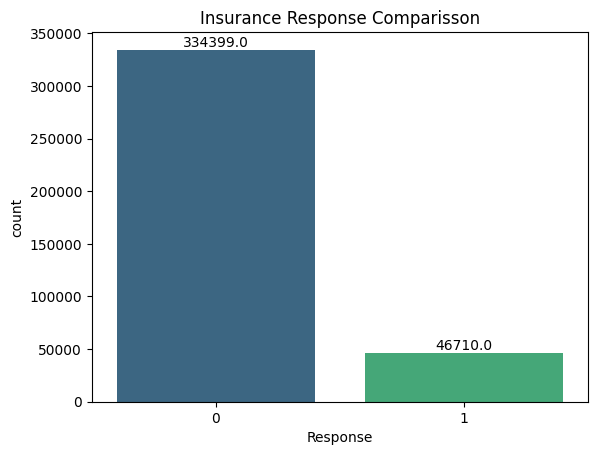

In [12]:
ax = sns.countplot(x='Response', data=df, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.title('Insurance Response Comparisson')
plt.show()

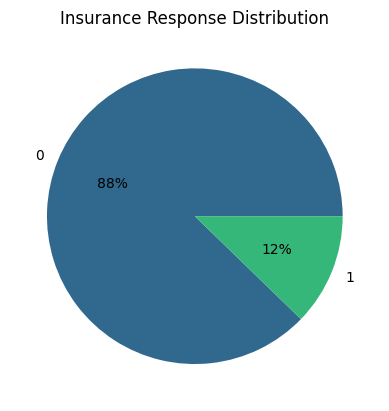

In [13]:
response_counts = df['Response'].value_counts()
colors = sns.color_palette('viridis', len(response_counts))

plt.pie(response_counts, labels=response_counts.index, autopct='%.0f%%', colors=colors)

plt.title('Insurance Response Distribution')
plt.show()

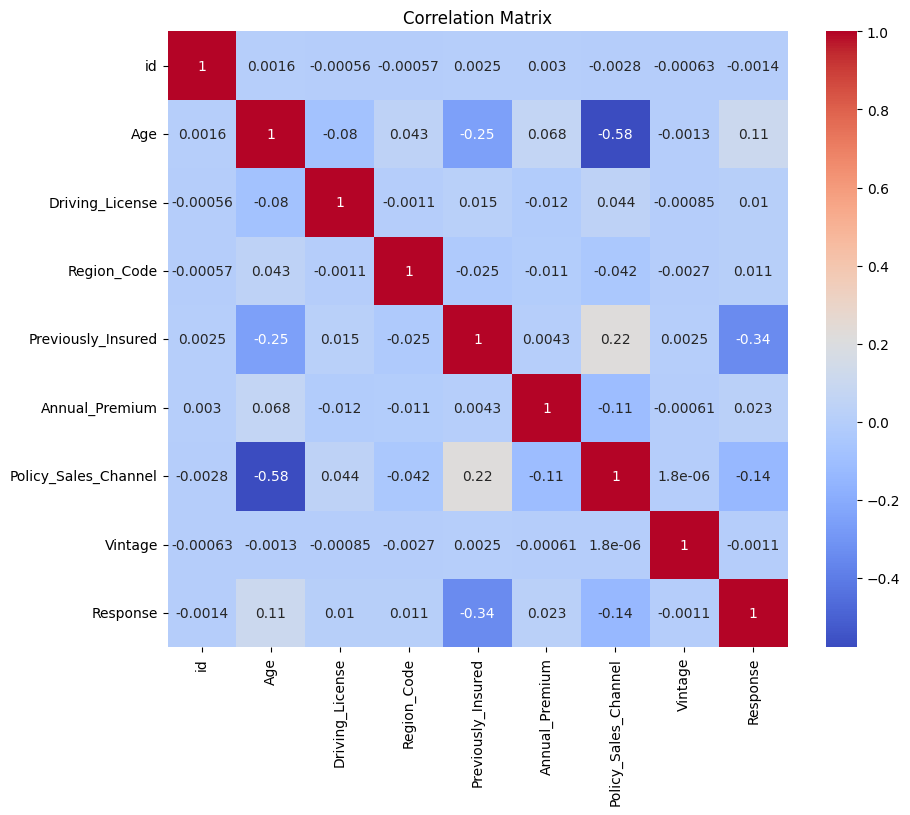

In [14]:
corr = num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Split train test

In [17]:
# UNDERSAMPLING, data tidak balance antara Not Interested dan interested pada kolom response
from imblearn.under_sampling import RandomUnderSampler
df.drop('id', axis=1, inplace=True)
X = df.drop('Response', axis=1)
y = df['Response']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)  # Set a random state for reproducibility

# Resample the data
X_resampled, y_resampled = rus.fit_resample(X, y)

# Create a new DataFrame with the resampled data
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Response'] = y_resampled

# Now df_resampled contains the undersampled data
# You can proceed with your model training using df_resampled

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [18]:
from sklearn.model_selection import train_test_split

In [19]:
#pisahkan data train dan data test

X = df_resampled.drop('Response', axis=1)
y = df_resampled['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
119348,Female,21,1,15,1,< 1 Year,No,39277,152,195
227184,Male,54,1,28,0,1-2 Year,Yes,38497,26,91
332108,Male,39,1,28,0,1-2 Year,Yes,45000,26,44
17531,Male,25,1,28,0,< 1 Year,Yes,2630,152,72
223674,Male,45,1,3,0,1-2 Year,Yes,29520,26,68


In [21]:
X_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
160681,Male,45,1,11,0,> 2 Years,Yes,33927,12,191
8426,Female,24,1,36,0,< 1 Year,Yes,27977,152,65
107617,Male,71,1,46,0,> 2 Years,Yes,40188,124,237
5966,Male,44,1,45,1,1-2 Year,No,35773,26,158
274426,Female,41,1,28,1,1-2 Year,No,30540,124,122


In [22]:
y_train.head()

,Response
119348,0
227184,1
332108,1
17531,1
223674,0


In [23]:
y_test.head()

,Response
160681,1
8426,1
107617,1
5966,0
274426,0


## Preprocessing Data

## Encoding

Encoding semua kategorical column

In [24]:
cat = X_train.select_dtypes(include = 'object').columns
for col in cat:
    print(col)
    print(X_train[col].value_counts())
    print('--------------------')

Gender
Gender
Male      42618
Female    32118
Name: count, dtype: int64
--------------------
Vehicle_Age
Vehicle_Age
1-2 Year     46253
< 1 Year     23398
> 2 Years     5085
Name: count, dtype: int64
--------------------
Vehicle_Damage
Vehicle_Damage
Yes    52896
No     21840
Name: count, dtype: int64
--------------------


In [25]:
from sklearn.preprocessing import LabelEncoder
encoders = {}
cat = X_train.select_dtypes(include = 'object').columns

# Fit and transform training data
for col in cat:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    encoders[col] = le  # Save the encoder for later use

# Transform validation and test data
for col in cat:
    le = encoders[col]  # Retrieve the encoder for this column
    X_test[col] = le.transform(X_test[col])

In [26]:
cat = X_train[['Gender', 'Vehicle_Age', 'Vehicle_Damage']].columns
for col in cat:
    print(col)
    print(X_train[col].value_counts())
    print('--------------------')

Gender
Gender
1    42618
0    32118
Name: count, dtype: int64
--------------------
Vehicle_Age
Vehicle_Age
0    46253
1    23398
2     5085
Name: count, dtype: int64
--------------------
Vehicle_Damage
Vehicle_Damage
1    52896
0    21840
Name: count, dtype: int64
--------------------


In [27]:
X_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
119348,0,21,1,15,1,1,0,39277,152,195
227184,1,54,1,28,0,0,1,38497,26,91
332108,1,39,1,28,0,0,1,45000,26,44
17531,1,25,1,28,0,1,1,2630,152,72
223674,1,45,1,3,0,0,1,29520,26,68


In [28]:
X_test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
160681,1,45,1,11,0,2,1,33927,12,191
8426,0,24,1,36,0,1,1,27977,152,65
107617,1,71,1,46,0,2,1,40188,124,237
5966,1,44,1,45,1,0,0,35773,26,158
274426,0,41,1,28,1,0,0,30540,124,122


Semua kolom object atau kategorik sudah diubah ke numerik. Langsung modeling

## Scaling

agar setiap fitur memiliki skala yang sama, dengan mean 0 dan standar deviasi 1. Menghindari bias, terutama jika menggunakan algoritma berbasis jarak seperti KNN, KMEANS, SVM

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and evaluation

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Logistic Regression Model

Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.60      0.74      9346
           1       0.71      0.98      0.82      9338

    accuracy                           0.79     18684
   macro avg       0.83      0.79      0.78     18684
weighted avg       0.83      0.79      0.78     18684



Text(0.5, 1.0, 'Confusion Matrix')

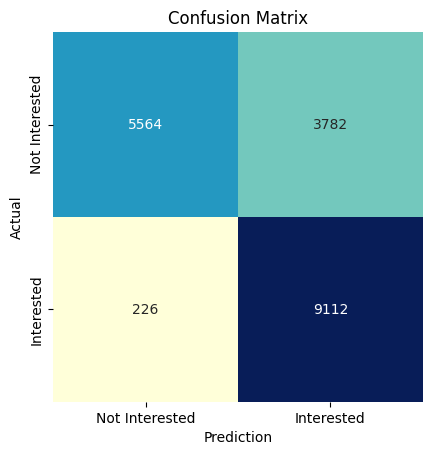

In [32]:
logreg = LogisticRegression()

logreg.fit(X_train_scaled, y_train)

#evaluation
y_test_pred = logreg.predict(X_test_scaled)
print('Logistic Regression')
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

class_names = ['Not Interested', 'Interested']

cmat_df = pd.DataFrame(cm, index=class_names, columns=class_names)

ax = sns.heatmap(cmat_df, square=True, annot=True, cbar=False, fmt='d', cmap="YlGnBu")
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
ax.set_title("Confusion Matrix")

## Random Forest

Random Forest
              precision    recall  f1-score   support

           0       0.84      0.69      0.76      9346
           1       0.74      0.87      0.80      9338

    accuracy                           0.78     18684
   macro avg       0.79      0.78      0.78     18684
weighted avg       0.79      0.78      0.78     18684



Text(0.5, 1.0, 'Confusion Matrix')

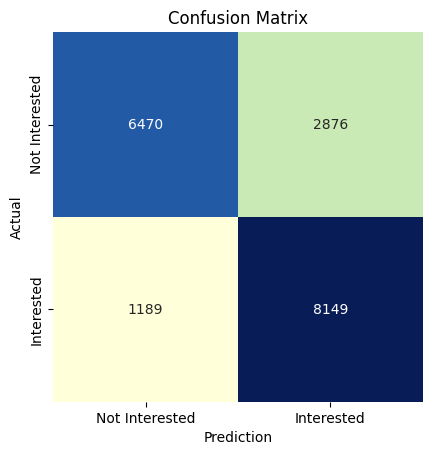

In [34]:
rf_clf = RandomForestClassifier(random_state=42)

rf_clf.fit(X_train, y_train)

#evaluation
y_test_pred = rf_clf.predict(X_test)
print('Random Forest')
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

class_names = ['Not Interested', 'Interested']

cmat_df = pd.DataFrame(cm, index=class_names, columns=class_names)

ax = sns.heatmap(cmat_df, square=True, annot=True, cbar=False, fmt='d', cmap="YlGnBu")
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
ax.set_title("Confusion Matrix")

### Tuning Random Forest

atur hyper parameter dari random forest agar memberikan hasil yang lebih baik

In [31]:
'''
%%time
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, accuracy_score
param_grid = {
    'n_estimators': [100,150],
    'max_depth': [ 10, 20],
    'min_samples_leaf': [1, 2]
}

rf_clf = RandomForestClassifier(random_state=1000)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_clf,
    param_distributions=param_grid,
    n_iter=8,  # Number of parameter settings sampled
    scoring='accuracy',  # Use accuracy as the evaluation metric
    cv=3,  # Use 5-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=2,  # Increase verbosity for more output during the search
    random_state=42  # Set a random state for reproducibility
)

# Perform the random search
random_search.fit(X_train, y_train)

# Print the best hyperparameters and best score
print("Best hyperparameters:", random_search.best_params_)
print("Best score:", random_search.best_score_)

# Evaluate the best model on the validation set
best_rf_model = random_search.best_estimator_
y_test_pred = best_rf_model.predict(X_test)
print(classification_report(y_test, y_test_pred))
'''

'\n%%time\nfrom sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.metrics import f1_score, accuracy_score\nparam_grid = {\n    \'n_estimators\': [100,150],\n    \'max_depth\': [ 10, 20],\n    \'min_samples_leaf\': [1, 2]\n}\n\nrf_clf = RandomForestClassifier(random_state=1000)\n\n# Create the RandomizedSearchCV object\nrandom_search = RandomizedSearchCV(\n    estimator=rf_clf,\n    param_distributions=param_grid,\n    n_iter=8,  # Number of parameter settings sampled\n    scoring=\'accuracy\',  # Use accuracy as the evaluation metric\n    cv=3,  # Use 5-fold cross-validation\n    n_jobs=-1,  # Use all available CPU cores\n    verbose=2,  # Increase verbosity for more output during the search\n    random_state=42  # Set a random state for reproducibility\n)\n\n# Perform the random search\nrandom_search.fit(X_train, y_train)\n\n# Print the best hyperparameters and best score\nprint("Best hyperparameters:", random_search.best_params_)\nprint("Best score:", random_search.best

Best parameter for random forest
- 'n_estimators': 150
- 'min_samples_leaf': 2
- 'max_depth': 10



Logistic Regression
              precision    recall  f1-score   support

           0       0.89      0.68      0.77      9346
           1       0.74      0.92      0.82      9338

    accuracy                           0.80     18684
   macro avg       0.82      0.80      0.79     18684
weighted avg       0.82      0.80      0.79     18684



Text(0.5, 1.0, 'Confusion Matrix')

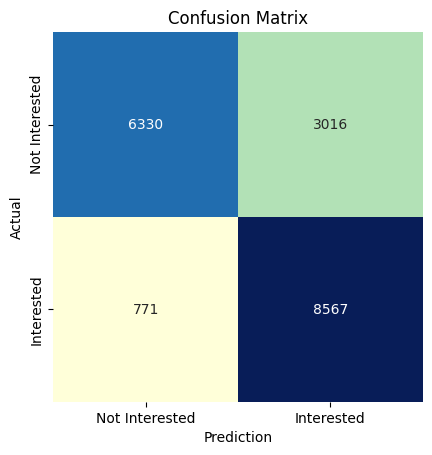

In [32]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators = 150, min_samples_leaf=2, max_depth=30)

rf_clf.fit(X_train, y_train)

#evaluation
y_test_pred = rf_clf.predict(X_test)
print('Logistic Regression')
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)

class_names = ['Not Interested', 'Interested']

cmat_df = pd.DataFrame(cm, index=class_names, columns=class_names)

ax = sns.heatmap(cmat_df, square=True, annot=True, cbar=False, fmt='d', cmap="YlGnBu")
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual')
ax.set_title("Confusion Matrix")

Setelah dilakukan tuning model random forest memiliki performa yang lebih baik. Dapat terlihat dari classification report score, nilai matriks precission, recall, f1-score dan accuracy

## Import Model

In [35]:
# Pakai Model Random Forest karena memiliki performa yang paling baik

import pickle

# Assuming 'rf_clf' is your trained RandomForestClassifier model
# Save the model to a file
insurance_prediction = 'rf_model.pkl'
pickle.dump(rf_clf, open(insurance_prediction, 'wb'))

In [36]:
# Load the model from the file
loaded_model = pickle.load(open(insurance_prediction, 'rb'))

# Now you can use the loaded_model to make predictions
# Example:
y_pred = loaded_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.69      0.76      9346
           1       0.74      0.87      0.80      9338

    accuracy                           0.78     18684
   macro avg       0.79      0.78      0.78     18684
weighted avg       0.79      0.78      0.78     18684

